### Imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

### Data Extraction

In [3]:
start_date = '2017-01-01'
end_date = '2022-06-01'
symbol = 'SPY'
df = yf.download(symbol, start_date, end_date, group_by="ticker")
df.columns = df.columns.droplevel()
df

/tmp/ipykernel_1405517/634414655.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start_date, end_date, group_by="ticker")
[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,195.943189,196.631052,194.933182,196.117340,91366500
2017-01-04,196.448252,197.432152,196.439550,197.284134,78744400
2017-01-05,197.014137,197.284053,196.326273,197.127319,78379000
2017-01-06,197.240541,198.302801,196.691993,197.832626,71559900
2017-01-09,197.571456,197.710772,197.144806,197.179642,46939700
...,...,...,...,...,...
2022-05-24,374.620138,377.091772,369.276050,375.889374,91448800
2022-05-25,374.381509,381.195227,373.980720,379.210266,91472900
2022-05-26,380.450906,388.438395,380.240959,386.787445,82168300


### Feature Adjustments

In [11]:
# Add Moving Averages
df["MA_12"] = df["Close"].rolling(window=12).mean()
df["MA_21"] = df["Close"].rolling(window=21).mean()
df.loc[df["MA_12"] > df["MA_21"], "Signal"] = 1
df.loc[df["MA_12"] <= df["MA_21"], "Signal"] = 0
df["Signal"] = df["Signal"].shift(1)
df.tail(20)

Price,Open,High,Low,Close,Volume,MA_12,MA_21,Signal,lread_bench,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2022-05-03,396.044115,399.784955,394.469496,397.351501,100028200,407.515617,415.091961,0.0,0.004574,0.004574,0.706108,1.026091
2022-05-04,398.019500,410.024612,394.803513,409.452026,144247900,406.807048,413.831373,0.0,0.029998,0.029998,0.736107,1.087791
2022-05-05,405.148162,405.577609,390.728699,394.898987,172929100,404.323479,412.139990,0.0,-0.036190,-0.036190,0.699917,1.013585
2022-05-06,392.312817,395.843710,387.188229,392.541840,151770800,401.669731,410.541311,0.0,-0.005987,-0.005987,0.693930,1.001566
2022-05-09,386.587018,387.837149,378.380030,379.973724,155586100,398.497482,408.241904,0.0,-0.032541,-0.032541,0.661389,0.937482
2022-05-10,386.004900,387.522234,376.776833,380.851685,132497200,396.354286,406.038836,0.0,0.002308,0.002308,0.663697,0.941958
2022-05-11,379.878306,385.575480,374.047517,374.801422,142361000,393.510468,403.895297,0.0,-0.016014,-0.016014,0.647683,0.911108
2022-05-12,371.575883,377.712027,367.548735,374.410156,125090800,391.620951,401.807197,0.0,-0.001044,-0.001044,0.646639,0.909113
2022-05-13,378.580397,384.754720,377.530661,383.361450,104174400,390.384336,399.917228,0.0,0.023626,0.023626,0.670265,0.954756


In [10]:
# Add Returns
df["lrets_bench"] = np.log(df["Close"] / df["Close"].shift(1))
df["lrets_prod_bench"] = df["lrets_bench"].cumsum()
df["prod_bench"] = np.exp(df["lrets_prod_bench"]) - 1
df.head(3)

Price,Open,High,Low,Close,Volume,MA_12,MA_21,Signal,lread_bench,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2017-01-03,195.943189,196.631052,194.933182,196.117340,91366500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,196.448252,197.432152,196.439550,197.284134,78744400,NaN,NaN,NaN,0.005932,0.005932,0.005932,0.005949
2017-01-05,197.014137,197.284053,196.326273,197.127319,78379000,NaN,NaN,NaN,-0.000795,-0.000795,0.005137,0.005150


In [14]:
# Add Returns
df["lrets_strat"] = np.log(df["Open"].shift(-1) / df["Open"]) * df["Signal"]
df["lrets_prod_strat"] = df["lrets_strat"].cumsum()
df["prod_strat"] = np.exp(df["lrets_prod_strat"]) - 1
df.tail(3)

Price,Open,High,Low,Close,Volume,MA_12,MA_21,Signal,lread_bench,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2022-05-26,380.450906,388.438395,380.240959,386.787445,82168300,378.512057,385.437318,0.0,0.019784,0.019784,0.679162,0.972225,0.0,0.280388,0.323643
2022-05-27,389.268602,396.397226,389.068208,396.282715,84768700,380.302165,384.867009,0.0,0.024253,0.024253,0.703415,1.020641,0.0,0.280388,0.323643
2022-05-31,394.650835,397.427852,391.291709,394.059174,95937000,381.939583,384.909270,0.0,-0.005627,-0.005627,0.697788,1.009303,NaN,NaN,NaN


In [15]:
# Remove Nands
df.dropna(inplace=True)

In [16]:
df

Price,Open,High,Low,Close,Volume,MA_12,MA_21,Signal,lread_bench,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2017-02-02,198.189607,198.607555,197.493055,198.320221,69657600,198.193277,197.837630,1.0,0.000659,0.000659,0.011170,0.011232,0.005258,0.005258,0.005272
2017-02-03,199.234484,199.870094,198.921030,199.687241,80563200,198.381201,197.952064,1.0,0.006869,0.006869,0.018039,0.018203,0.000218,0.005477,0.005492
2017-02-06,199.278021,199.678551,198.990687,199.330261,57790100,198.600329,198.056966,1.0,-0.001789,-0.001789,0.016250,0.016383,0.002226,0.007703,0.007733
2017-02-07,199.722147,199.965943,199.147479,199.339035,57931200,198.759963,198.128700,1.0,0.000044,0.000044,0.016294,0.016427,-0.001920,0.005783,0.005799
2017-02-08,199.338975,199.730789,198.790428,199.600189,51566200,198.984165,198.243964,1.0,0.001309,0.001309,0.017603,0.017759,0.001309,0.007092,0.007117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,374.877740,379.553834,372.539722,378.780853,76414900,379.468737,388.405192,0.0,0.018537,0.018537,0.658245,0.931399,-0.000000,0.280388,0.323643
2022-05-24,374.620138,377.091772,369.276050,375.889374,91448800,378.081032,386.831960,0.0,-0.007663,-0.007663,0.650582,0.916655,-0.000000,0.280388,0.323643
2022-05-25,374.381509,381.195227,373.980720,379.210266,91472900,378.017410,385.980813,0.0,0.008796,0.008796,0.659378,0.933589,0.000000,0.280388,0.323643


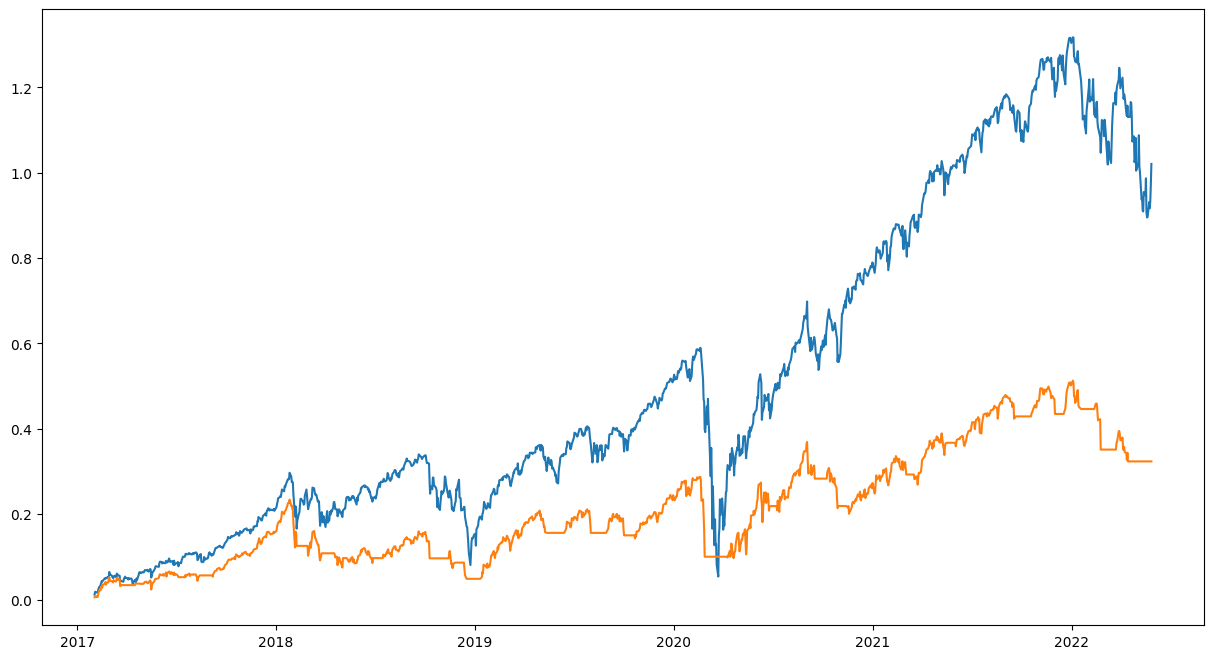

In [17]:
fig = plt.figure(figsize=(15,8))
plt.plot(df["prod_bench"])
plt.plot(df["prod_strat"])
plt.show()

#### Metrics

In [19]:
print("Benchmark Returns: ", df["prod_bench"].iloc[-1])
print("Strategy Returns: ", df["prod_strat"].iloc[-1])


Benchmark Returns:  1.0206408809448173
Strategy Returns:  0.32364293285345536
